### Leer librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

import matplotlib.patches as patches
from sklearn.model_selection import train_test_split

from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import sys
from sklearn import datasets

from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Funciones

In [3]:
window_size = 15
batch_size = 128
shuffle_buffer = 1000
pob_ciudades = pd.read_excel('https://github.com/DavidGD03/plastics-COVID_project/blob/main/data/PoblacionCiudades.xlsx?raw=true')

In [4]:
fechaITrain='2020-05-01'
fechaFTrain='2021-01-15'
fechaITest='2021-01-01'
fechaFTest='2021-05-15'
fechaIReal='2021-01-01'
fechaFReal='2021-04-30'

In [5]:
!cp '/content/drive/MyDrive/Proyecto-Residuos-COVID-AMB/Implementacion/Funciones/DataProcessing.py' .
!cp '/content/drive/MyDrive/Proyecto-Residuos-COVID-AMB/Implementacion/Funciones/DataPrediction.py' .
!cp '/content/drive/MyDrive/Proyecto-Residuos-COVID-AMB/Implementacion/Funciones/RNN_Functions.py' .
!cp '/content/drive/MyDrive/Proyecto-Residuos-COVID-AMB/Implementacion/Funciones/LSTM_Functions.py' .
!cp '/content/drive/MyDrive/Proyecto-Residuos-COVID-AMB/Implementacion/Funciones/Generation_Model.py' .
!cp '/content/drive/MyDrive/Proyecto-Residuos-COVID-AMB/Implementacion/Funciones/Plot_Results.py' .

In [6]:
from DataProcessing import * # preprocesamiento de datos
from DataPrediction import * # predicciones en base a los datos
from RNN_Functions import * # funciones para la RNN
from LSTM_Functions import * # funciones para la LSTM
from Generation_Model import * # funciones para el modelo de generación de residuos
from Plot_Results import * # funciones para graficar resultados del modelo

# Plot RNN Model

In [8]:
!pip3 install ann_visualizer -q
!pip install graphviz -q

In [26]:
from keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(32, return_sequences=True,activation='tanh', input_shape=(window_size, 1),name='RNN_layer1'))
model.add(SimpleRNN(32, return_sequences=True,activation='tanh',name='RNN_layer2'))
model.add(SimpleRNN(32, return_sequences=False,activation='tanh',name='RNN_layer3'))
model.add(Dense(64,activation='relu', input_shape=(window_size, 1),name='middle1_layer'))
model.add(Dense(32,activation='relu',name='middle2_layer'))
model.add(Dense(1,activation='linear', name='ouput_layer')) 
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 RNN_layer1 (SimpleRNN)      (None, 15, 32)            1088      
                                                                 
 RNN_layer2 (SimpleRNN)      (None, 15, 32)            2080      
                                                                 
 RNN_layer3 (SimpleRNN)      (None, 32)                2080      
                                                                 
 middle1_layer (Dense)       (None, 64)                2112      
                                                                 
 middle2_layer (Dense)       (None, 32)                2080      
                                                                 
 ouput_layer (Dense)         (None, 1)                 33        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-traina

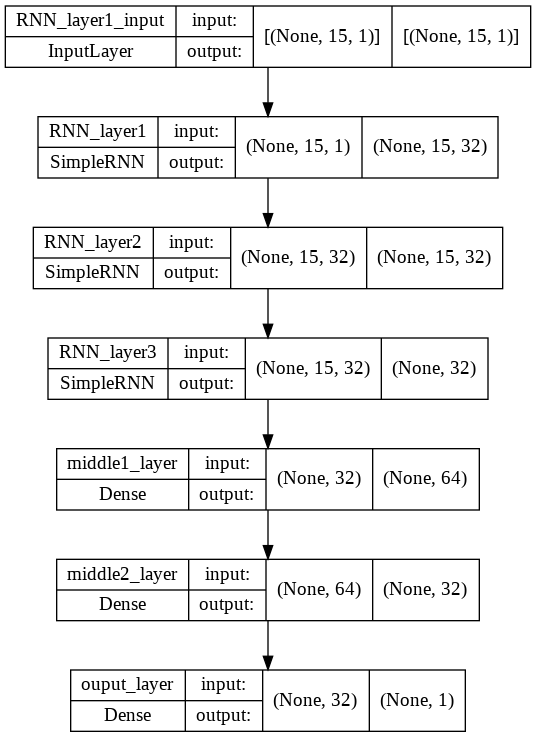

In [27]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
from ann_visualizer.visualize import ann_viz;
ann_viz(model,view=True,filename='network.gv', title="My first neural network")

# Ciudades

## Bucaramanga sin media móvil

In [ ]:
if 'dataframe' not in locals():
  dataframe = pd.read_csv("https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD")

dfBucaramanga = dataframe[dataframe["Nombre municipio"]=='BUCARAMANGA']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### RNN 30

In [ ]:
contagiados, train, test, sc, train_scale, test_scale = PreproceDatosP(dfBucaramanga,'BUCARAMANGA',fechaITrain,fechaFTrain,fechaITest,fechaFTest,False)

In [ ]:
trainRNN = windowed_dataset(train_scale, window_size, batch_size)
testRNN2 = windowed_dataset(test_scale, window_size, batch_size)

Epoch 1/200
2/2 [==============================] - 6s 465ms/step - loss: 0.1072 - mse: 0.1072 - mae: 0.2632
Epoch 2/200
2/2 [==============================] - 0s 70ms/step - loss: 0.1254 - mse: 0.1254 - mae: 0.2850
Epoch 3/200
2/2 [==============================] - 0s 70ms/step - loss: 0.0334 - mse: 0.0334 - mae: 0.1519
Epoch 4/200
2/2 [==============================] - 0s 71ms/step - loss: 0.0275 - mse: 0.0275 - mae: 0.1352
Epoch 5/200
2/2 [==============================] - 0s 73ms/step - loss: 0.0256 - mse: 0.0256 - mae: 0.1282
Epoch 6/200
2/2 [==============================] - 0s 79ms/step - loss: 0.0248 - mse: 0.0248 - mae: 0.1238
Epoch 7/200
2/2 [==============================] - 0s 73ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1224
Epoch 8/200
2/2 [==============================] - 0s 94ms/step - loss: 0.0256 - mse: 0.0256 - mae: 0.1226
Epoch 9/200
2/2 [==============================] - 0s 74ms/step - loss: 0.0330 - mse: 0.0330 - mae: 0.1394
Epoch 10/200
2/2 [==================

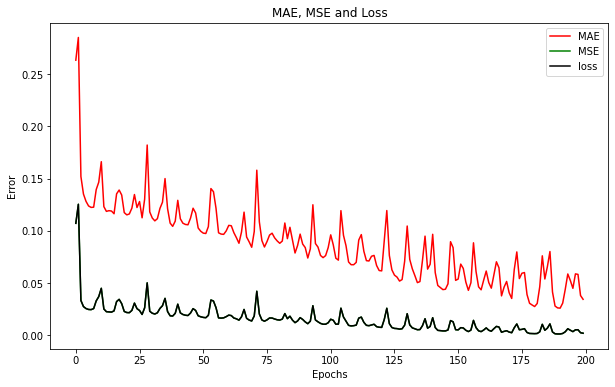

In [ ]:
modelRNN1 = ModeloRNN(window_size)
FitRNN(modelRNN1, trainRNN)

,index,Casos
0,2020-05-21,0.000022
1,2020-05-23,0.000024
2,2020-05-31,0.000025
3,2020-06-02,0.000018
4,2020-06-03,0.000045
...,...,...
208,2020-12-27,0.000252
209,2020-12-28,0.000420
210,2020-12-29,0.000403
211,2020-12-30,0.000506


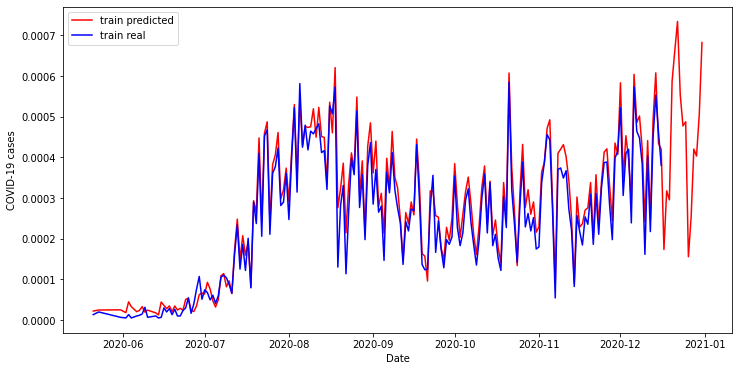

In [ ]:
PredicTrainS(modelRNN1,trainRNN,train,window_size,sc)

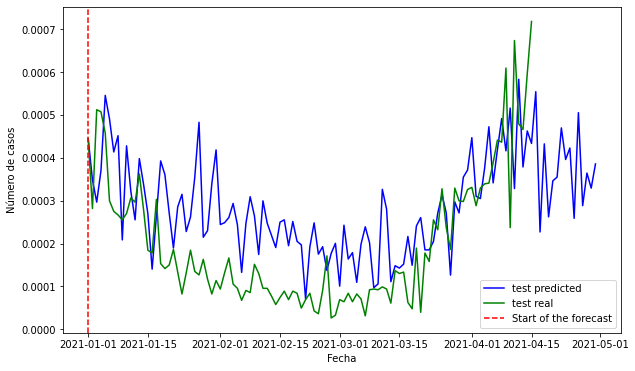

In [ ]:
testRNN=PredicTestS(modelRNN1,contagiados,train,test_scale,test,window_size,batch_size,sc)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


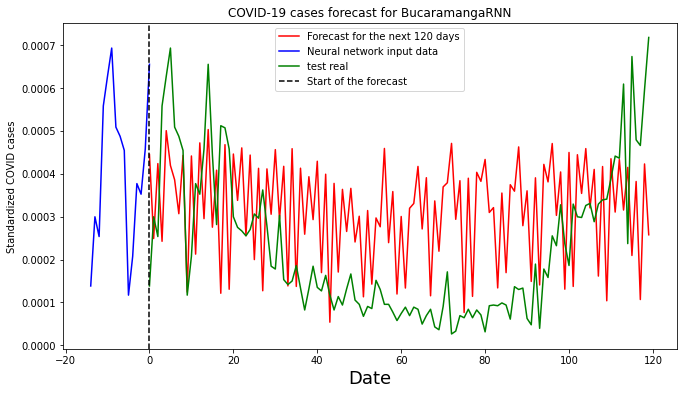

In [ ]:
Predic120DiasRA(train, contagiados, modelRNN1, window_size,batch_size,'BucaramangaRNN',sc,fechaITest,fechaIReal,fechaFReal)

In [ ]:
# MAE para los datos de train
modelRNN1.evaluate(trainRNN)

2/2 [==============================] - 1s 39ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0430


[0.0026855450123548508, 0.0026855450123548508, 0.04303637519478798]

In [ ]:
# MAE para los datos de test
modelRNN1.evaluate(testRNN2)

1/1 [==============================] - 0s 102ms/step - loss: 0.0785 - mse: 0.0785 - mae: 0.2044


[0.07854294776916504, 0.07854294776916504, 0.20438948273658752]

## Bucaramanga con media móvil

In [ ]:
if 'dataframe' not in locals():
  dataframe = pd.read_csv("https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD")

dfBucaramanga = dataframe[dataframe["Nombre municipio"]=='BUCARAMANGA']

### RNN 30

In [ ]:
contagiados, train, test, sc, train_scale, test_scale = PreproceDatosP(dfBucaramanga,'BUCARAMANGA',fechaITrain,fechaFTrain,fechaITest,fechaFTest,True)

In [ ]:
trainRNN = windowed_dataset(train_scale, window_size, batch_size)
testRNN2 = windowed_dataset(test_scale, window_size, batch_size)

Epoch 1/200
2/2 [==============================] - 4s 97ms/step - loss: 0.1061 - mse: 0.1061 - mae: 0.2599
Epoch 2/200
2/2 [==============================] - 0s 74ms/step - loss: 0.0969 - mse: 0.0969 - mae: 0.2654
Epoch 3/200
2/2 [==============================] - 0s 73ms/step - loss: 0.0546 - mse: 0.0546 - mae: 0.1853
Epoch 4/200
2/2 [==============================] - 0s 70ms/step - loss: 0.0290 - mse: 0.0290 - mae: 0.1429
Epoch 5/200
2/2 [==============================] - 0s 92ms/step - loss: 0.0166 - mse: 0.0166 - mae: 0.1029
Epoch 6/200
2/2 [==============================] - 0s 87ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0958
Epoch 7/200
2/2 [==============================] - 0s 84ms/step - loss: 0.0131 - mse: 0.0131 - mae: 0.0889
Epoch 8/200
2/2 [==============================] - 0s 80ms/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0843
Epoch 9/200
2/2 [==============================] - 0s 87ms/step - loss: 0.0208 - mse: 0.0208 - mae: 0.1111
Epoch 10/200
2/2 [===================

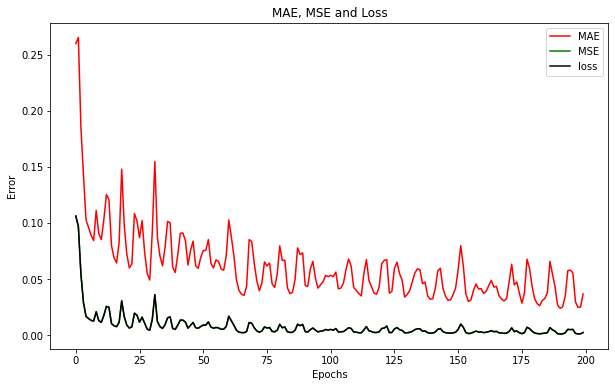

In [ ]:
modelRNN1 = ModeloRNN(window_size)
FitRNN(modelRNN1, trainRNN)

,index,Casos
0,2020-05-21,0.000005
1,2020-05-23,0.000005
2,2020-05-31,0.000005
3,2020-06-02,0.000006
4,2020-06-03,0.000007
...,...,...
208,2020-12-27,0.000485
209,2020-12-28,0.000438
210,2020-12-29,0.000400
211,2020-12-30,0.000380


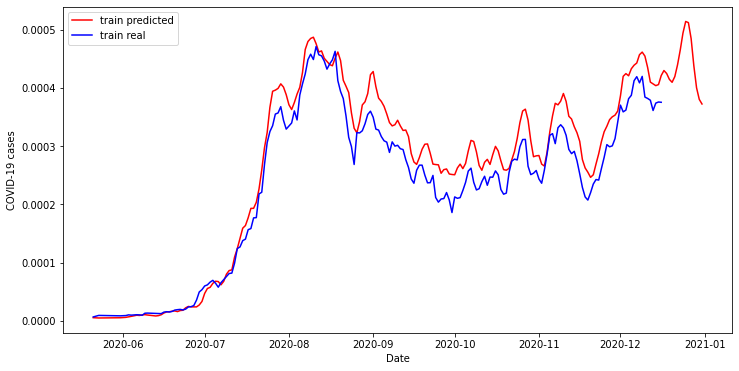

In [ ]:
PredicTrainS(modelRNN1,trainRNN,train,window_size,sc)

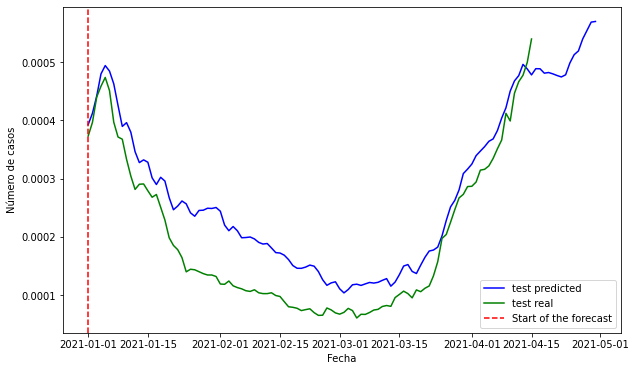

In [ ]:
testRNN=PredicTestS(modelRNN1,contagiados,train,test_scale,test,window_size,batch_size,sc)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


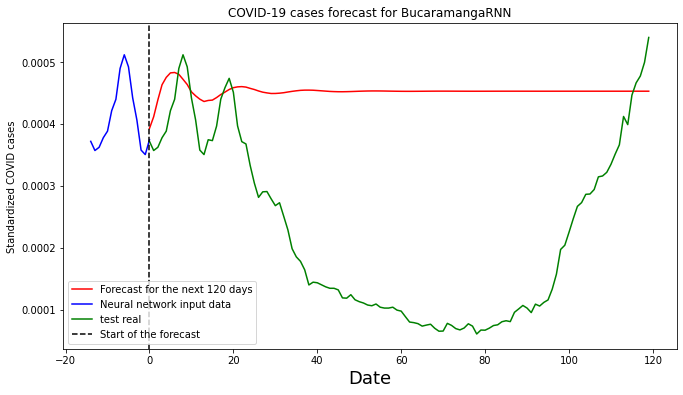

In [ ]:
Predic120DiasRA(train, contagiados, modelRNN1, window_size,batch_size,'BucaramangaRNN',sc,fechaITest,fechaIReal,fechaFReal)

In [ ]:
# MAE para los datos de train
modelRNN1.evaluate(trainRNN)

2/2 [==============================] - 1s 42ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0612


[0.005470365285873413, 0.005470365285873413, 0.06117139756679535]

In [ ]:
# MAE para los datos de test
modelRNN1.evaluate(testRNN2)

1/1 [==============================] - 0s 102ms/step - loss: 0.0263 - mse: 0.0263 - mae: 0.1310


[0.026323938742280006, 0.026323938742280006, 0.13103346526622772]

# Datos Simulacion Residuos

## Generacion

In [ ]:
# Infectados
testRNN['index'] = pd.to_datetime(testRNN['index'], infer_datetime_format=True)
df_sim_m=testRNN.groupby([testRNN['index'].dt.strftime('%Y-%m')])['Casos'].sum()

# **Simulación de generación de residuos**


### **Datos usados para la simulación**

1. **Dataset del crecimiento poblacion para el AMB según proyecciones del DANE**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DavidGD03/plastics-COVID_project/main/data/crecimiento_poblacional.csv')

2. **Dataset del Banco Mundial sobre la composición de los desechos en Colombia**

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/DavidGD03/plastics-COVID_project/main/data/tasa_residuos.csv')
df2_filtro = df2[df2["country_name"] == 'Colombia']
df2_filtro = df2_filtro.dropna(axis=1)

In [ ]:
df2_filtro['composition_plastic_percent']

41    12.83
Name: composition_plastic_percent, dtype: float64

3. **Datos de toneladas totales y aprovechables en el AMB desde 2016 hasta 2021 según el SUI**

In [ ]:
ton_aprov_mes = pd.read_excel('https://github.com/DavidGD03/plastics-COVID_project/blob/main/data/ton_aprov_mes%20_E.xlsx?raw=true')
ton_tot_mes = pd.read_excel('https://github.com/DavidGD03/plastics-COVID_project/blob/main/data/ton_totales_mes%20_E.xlsx?raw=true')
ton_aprov_mes=ton_aprov_mes.set_index(['MES'])
ton_tot_mes=ton_tot_mes.set_index(['MES'])

In [ ]:
ton_ac=[]
for i in range(12):
  ton_ac.append(ton_tot_mes.iloc[i].dropna().mean())

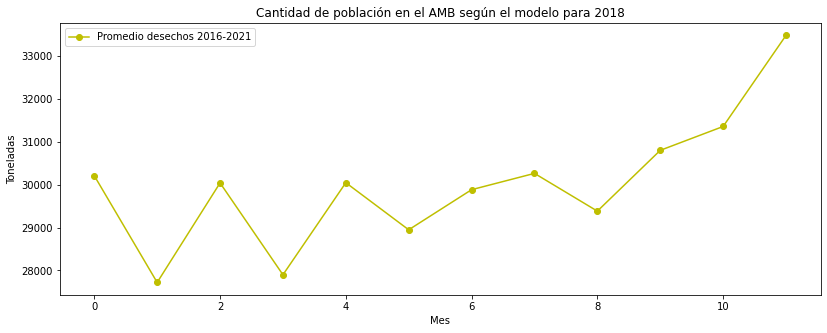

In [ ]:
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(ton_ac,label='Promedio desechos 2016-2021',marker='o',color='y');
ax.legend();
ax.set_xlabel('Mes');
ax.set_ylabel('Toneladas');
ax.title.set_text('Cantidad de población en el AMB según el modelo para 2018')
#ax.set_ylim(ymin=1170000,ymax=1200000)
plt.show()

In [ ]:
ton_tot_mes[2021].iloc[0]=29079.78
ton_tot_mes[2021].iloc[1]=27150.20
ton_tot_mes[2021].iloc[2]=30495.53
ton_tot_mes[2021].iloc[3]=28726.51

Dataset actualizado:

In [ ]:
ton_tot_act = pd.read_excel('https://github.com/DavidGD03/plastics-COVID_project/blob/main/data/ton_simulacion_2021.xlsx?raw=true')

In [ ]:
options=['BUCARAMANGA','FLORIDABLANCA','GIRON','PIEDECUESTA']
ton_tot_bga=ton_tot_act[ton_tot_act["MUNICIPIO ORIGEN DE LOS RESIDUOS"].isin(options)]

In [ ]:
ton_tot_bga2=ton_tot_bga[['MES','TONELADAS DISPUESTAS']]

In [ ]:
dfact=pd.DataFrame(ton_tot_bga2.groupby(['MES'])['TONELADAS DISPUESTAS'].sum())

In [ ]:
dfact.reset_index()

,MES,TONELADAS DISPUESTAS
0,ABRIL,28726.51
1,ENERO,29079.78
2,FEBRERO,27150.20
3,JUNIO,30255.18
4,MARZO,30495.53
5,MAYO,29053.82


### **Definición de variables**

**Variables:**

- Pop= cantidad total de habitantes en el AMB

- WGR= Tasa de generacion de residos per capita

- n= Año de la simulación

- pgr= Tasa de crecimiento poblacional obtenido de manera aleatoria
- wggr= Tasa de crecimiento de generación de residuos obtenido de manera aleatoria







In [ ]:
# Usaremos solo ciertos años del dataset de tasa crecimiento poblacional en el AMB
df3=df.iloc[:,11:15]
df3_T = df3.T
df3_p=(df3_T/100)/12
df3_p

,0
2016 [YR2016],0.001377
2017 [YR2017],0.001486
2018 [YR2018],0.001872
2019 [YR2019],0.002540


In [ ]:
pob_bga=['1177635','1204093','1240794','1270187']
df4=pd.DataFrame(pob_bga,columns=['POB'],index=['2017','2018','2019','2020'])

In [ ]:
dfton2=pd.DataFrame()
for i in range(len(df4)):
  dfton=ton_tot_mes[float(df4.index[i])]/float(df4['POB'].iloc[i])
  dfton2=pd.concat([dfton2,dfton])

In [ ]:
df_ton3=dfton2.pct_change()
df_ton4=df_ton3.fillna(df_ton3.mean())

### Enfoque Bayesiano en el Modelo

In [ ]:
df_ton_normal = np.concatenate((df_ton4.iloc[:9].values, df_ton4.iloc[12:21].values), axis=0)
df_ton_normal= np.concatenate((df_ton_normal, df_ton4.iloc[24:33].values), axis=0)
df_ton_normal= np.concatenate((df_ton_normal, df_ton4.iloc[36:45].values), axis=0)
df_ton_alto= np.concatenate((df_ton4.iloc[10:13].values, df_ton4.iloc[21:24].values), axis=0)
df_ton_alto= np.concatenate((df_ton_alto, df_ton4.iloc[33:36].values), axis=0)
df_ton_alto= np.concatenate((df_ton_alto, df_ton4.iloc[45:48].values), axis=0)

In [ ]:
df_ton_normal=pd.DataFrame(df_ton_normal,columns=['Tons'])
df_ton_alto=pd.DataFrame(df_ton_alto,columns=['Tons'])

In [ ]:
# Get the frequency, PDF and CDF for each value in the series

# Frequency
stats_df = df_ton_normal \
.groupby('Tons') \
['Tons'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'Tons': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()

In [ ]:
# Get the frequency, PDF and CDF for each value in the series

# Frequency
stats_df2 = df_ton_alto \
.groupby('Tons') \
['Tons'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'Tons': 'frequency'})

# PDF
stats_df2['pdf'] = stats_df2['frequency'] / sum(stats_df2['frequency'])

# CDF
stats_df2['cdf'] = stats_df2['pdf'].cumsum()
stats_df2 = stats_df2.reset_index()

### **Generación de datos**

In [ ]:
PopInitial=1270187 # DANE - población AMB en 2020
porcen_plasticS=0.128 # porcentaje de plástico según banco mundial
porcen_plasticI=0.4 # porcentaje plástico gente enferma
WGRInitial=0.033 # tasa de crecimiento de residuos diciembre 2019
porcen_I=0.8
porcen_S=1.025
meses=4
iter=20

In [ ]:
pred_pop100sd,pred_wgr100sd,pred_WQ100sd,pred_pgr100sd,pred_WQplastic100sd,pred_WQs100sd, pred_WQsp100sd=[],[],[],[],[],[],[]
pred_pop100=np.zeros((meses, 1))
pred_wgr100=np.zeros((meses, 1))
pred_pgr100=np.zeros((meses, 1))
pred_WQ100=np.zeros((meses, 1))
pred_WQplastic100=np.zeros((meses, 1))
pred_WQs100=np.zeros((meses, 1))
pred_WQsp100=np.zeros((meses, 1))

# Generamos las predicciones
for i in range(iter):
  pred_pop2,pred_wgr2,pred_WQ2,pred_pgr2,pred_WQpl2,predWQs2,predWQsp2=[],[],[],[],[],[],[]
  pred_pop2,pred_wgr2,pred_WQ2,pred_pgr2,pred_WQpl2,predWQs2,predWQsp2=sim_generacion(meses,2,PopInitial,porcen_plasticS,porcen_plasticI,WGRInitial,porcen_I,porcen_S,df3_p,stats_df,stats_df2,df_sim_m)

  pred_pop100sd.append(pred_pop2)
  pred_wgr100sd.append(pred_wgr2)
  pred_pgr100sd.append(pred_pgr2)
  pred_WQ100sd.append(pred_WQ2)
  pred_WQplastic100sd.append(pred_WQpl2)
  pred_WQs100sd.append(predWQs2)
  pred_WQsp100sd.append(predWQsp2)
  
  pred_pop100=np.add(pred_pop100, pred_pop2)
  pred_wgr100=pred_wgr100+pred_wgr2
  pred_pgr100=np.add(pred_pgr100, pred_pgr2)
  pred_WQ100=np.add(pred_WQ100, pred_WQ2) 
  pred_WQplastic100=np.add(pred_WQplastic100, pred_WQpl2) 
  pred_WQs100=np.add(pred_WQs100, predWQs2) 
  pred_WQsp100=np.add(pred_WQsp100, predWQsp2) 

pred_pop100=pred_pop100/iter
pred_wgr100=pred_wgr100/iter
pred_pgr100=pred_pgr100/iter
pred_WQ100=pred_WQ100/iter
pred_WQplastic100=pred_WQplastic100/iter
pred_WQs100=pred_WQs100/iter
pred_WQsp100=pred_WQsp100/iter


indice=['JANUARY','FEBRUARY','MARCH','APRIL']
  #población
pred_pop_df=pd.DataFrame(pred_pop100,columns =['2021'],index=indice)
  #tasa crecimiento poblacional
pred_pgr_df=pd.DataFrame(pred_pgr100,columns =['2021'],index=indice) 
  #tasa residuos per cápita
  #pred_wgr_df=pd.DataFrame(pred_wgr100,columns =['2020'],index=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']) 
  #desechos totales
pred_wq_df=pd.DataFrame(pred_WQ100,columns =['2021'],index=indice) 

  #desechos plásticos
pred_wqp_df=pd.DataFrame(pred_WQplastic100,columns =['2021'],index=indice) 

pred_wqs_df=pd.DataFrame(pred_WQs100,columns =['2021'],index=indice) 

pred_wqsp_df=pd.DataFrame(pred_WQsp100,columns =['2021'],index=indice) 


# Desviación estándar
def sd_modelo(pred_sd):
  sd2=[]
  df_sd=pd.DataFrame(pred_sd)
  for i in range(meses):
    sd2v=np.std(df_sd[i])
    sd2.append(sd2v)
  return sd2

std_pop=sd_modelo(pred_pop100sd)
std_wgr=sd_modelo(pred_wgr100sd)
std_wq=sd_modelo(pred_WQ100sd)
std_pgr=sd_modelo(pred_pgr100sd)
std_wqp=sd_modelo(pred_WQplastic100sd)
std_wqs=sd_modelo(pred_WQs100sd)
std_wqsp=sd_modelo(pred_WQsp100sd)

### Datos reales AMB

In [ ]:
ton_tot_mes.index= (['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER'])

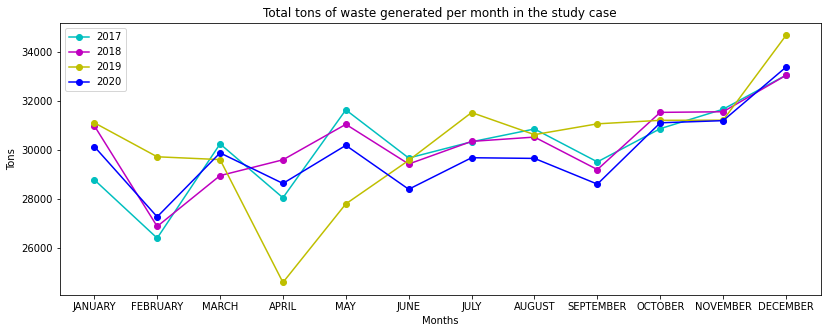

In [ ]:
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1, 2, 1)
#ax.plot(ton_tot_mes[2016],label='2016',marker='o',color='b');
ax.plot(ton_tot_mes[2017],label='2017',marker='o',color='c');
ax.plot(ton_tot_mes[2018],label='2018',marker='o',color='m');
ax.plot(ton_tot_mes[2019],label='2019',marker='o',color='y');
ax.plot(ton_tot_mes[2020],label='2020',marker='o',color='b');
#ax.plot(ton_tot_mes[2021],label='2021',marker='o',color='r');
ax.legend();
ax.set_xlabel('Months');
ax.set_ylabel('Tons');
ax.title.set_text('Total tons of waste generated per month in the study case')

In [ ]:
ton_plastic_mes=ton_tot_mes*porcen_plasticS

In [ ]:
plt.style.use('ggplot')

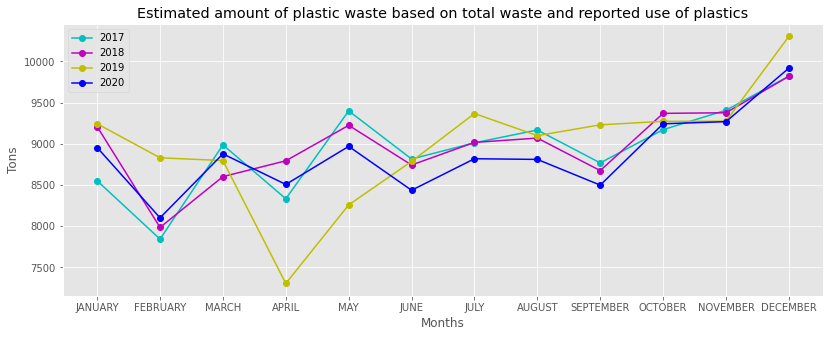

In [ ]:
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1, 2, 1)
#ax.plot(ton_tot_mes[2016],label='2016',marker='o',color='b');
ax.plot(ton_plastic_mes[2017],label='2017',marker='o',color='c');
ax.plot(ton_plastic_mes[2018],label='2018',marker='o',color='m');
ax.plot(ton_plastic_mes[2019],label='2019',marker='o',color='y');
ax.plot(ton_plastic_mes[2020],label='2020',marker='o',color='b');
#ax.plot(ton_tot_mes[2021],label='2021',marker='o',color='r');
ax.legend();
ax.set_xlabel('Months');
ax.set_ylabel('Tons');
ax.title.set_text('Estimated amount of plastic waste based on total waste and reported use of plastics')

### **Resultados del Modelo**

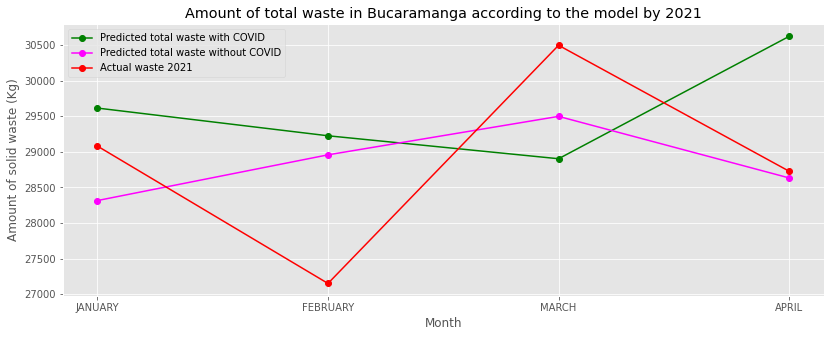

In [ ]:
plot_resultsT(pred_wq_df,pred_wqs_df,ton_tot_mes,0,std_wq,std_wqs)

In [ ]:
df_abs = abs(ton_tot_mes[2021].iloc[:4] - pred_wq_df['2021'])
df_abs

JANUARY      533.906403
FEBRUARY    2074.303260
MARCH       1593.529411
APRIL       1894.536468
dtype: float64

In [ ]:
df_abs2 = abs(ton_tot_mes[2021].iloc[:4] - pred_wqs_df['2021'])
df_abs2

JANUARY      765.221835
FEBRUARY    1806.522215
MARCH        998.434982
APRIL         94.193543
dtype: float64

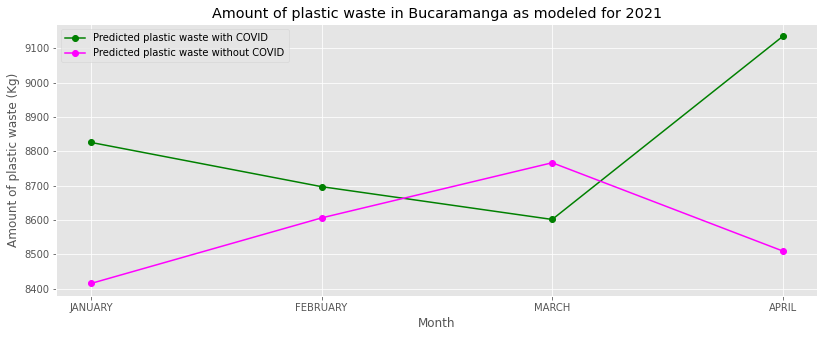

In [ ]:
plot_resultsP(pred_wqp_df,pred_wqsp_df,0,std_wqp,std_wqsp)

No handles with labels found to put in legend.


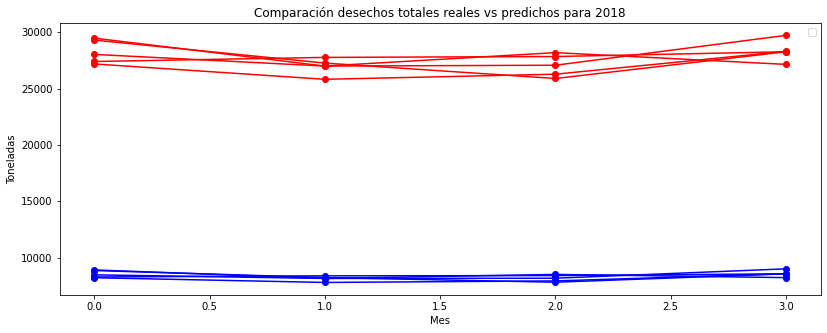

In [ ]:
# Comportamiento prediccion para las iteraciones
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1, 2, 1)
iter=5
for i in range(iter):
  r = random.random()
  b = random.random()
  g = random.random()
  color = (r, g, b)
  #label='Iteración',i+1
  ax.plot(pred_WQ100sd[i],marker='o',color='blue');
  #ax.plot(pred_WQs100sd[i],marker='o',color='red');
ax.legend();
ax.set_xlabel('Mes');
ax.set_ylabel('Toneladas');
ax.title.set_text('Comparación desechos totales reales vs predichos para 2018')
#ax.set_ylim(ymin=0,ymax=40000)

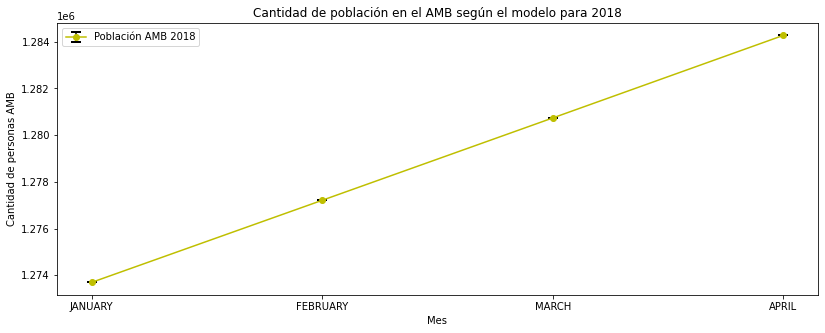

In [ ]:
# Comportamiento poblacion
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1, 2, 1)
ax.errorbar(pred_pop_df.index,pred_pop_df['2021'],yerr=std_pop,label='Población AMB 2018',capthick=2,capsize=5,ecolor="Black", marker='o' ,color='y');
#ax.plot(pred_pop_df,label='Población AMB 2018',marker='o' ,color='y');
ax.legend();
ax.set_xlabel('Mes');
ax.set_ylabel('Cantidad de personas AMB');
ax.title.set_text('Cantidad de población en el AMB según el modelo para 2018')
#ax.set_ylim(ymin=1170000,ymax=1200000)
plt.show()

In [ ]:
# Comportamiento tasa de crecimiento poblacional
#fig = plt.figure(figsize=(30,5))
#ax = fig.add_subplot(1, 2, 1)
#ax.errorbar(pred_pgr_df.index,pred_pgr_df['2020'],yerr=std_pgr,label='Tasa de crecimiento poblacional AMB 2018',capthick=2,capsize=5,ecolor="Black", marker='o' ,color='y');
#ax.legend();
#ax.set_xlabel('Mes');
#ax.set_ylabel('Tasa de crecimiento');
#ax.title.set_text('Tasa de crecimiento de población en el AMB según el modelo para 2018')
#ax.set_ylim(ymin=1170000,ymax=1200000)
#plt.show()

In [ ]:
# Comportamiento tasa residuos
#fig = plt.figure(figsize=(30,5))
#ax = fig.add_subplot(1, 2, 1)
#ax.errorbar(pred_wgr_df.index,pred_wgr_df['2020'],yerr=std_wgr,label='Tasa de residuos AMB 2018',capthick=2,capsize=5,ecolor="Black", marker='o' ,color='y');
#ax.legend();
#ax.set_xlabel('Mes');
#ax.set_ylabel('Tasa de residuos per cápita');
#ax.title.set_text('Tasa de residuos per cápita según el modelo para 2018')
#ax.set_ylim(ymin=0,ymax=0.04)